# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

13:58:25 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=919324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=715855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=198909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=435931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

13:58:26 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=352277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=969263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

13:58:28 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=960235;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=439947;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

13:58:29 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=454321;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=812204;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

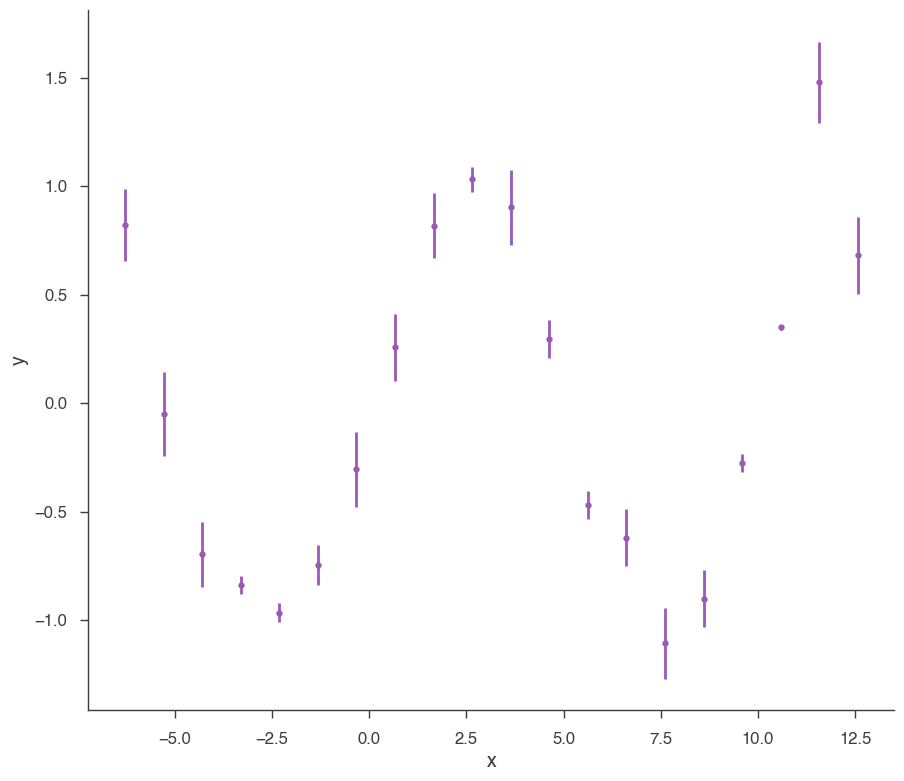

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=783016;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=245224;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

13:58:34 INFO      Mean acceptance fraction: 0.6386                                            ]8;id=101342;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=865275;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

13:58:35 INFO      fit restored to maximum of posterior                                         ]8;id=467807;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=613253;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=606924;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=828515;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.99 -0.22 +0.23) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.987 -0.028 +0.022) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-15.419496
total,-15.419496


Values of statistical measures:

,statistical measures
AIC,35.544874
BIC,36.830456
DIC,-377.268092
PDIC,-495.862148


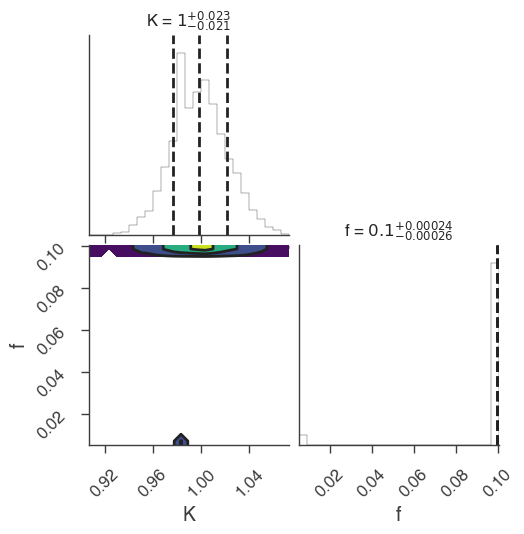

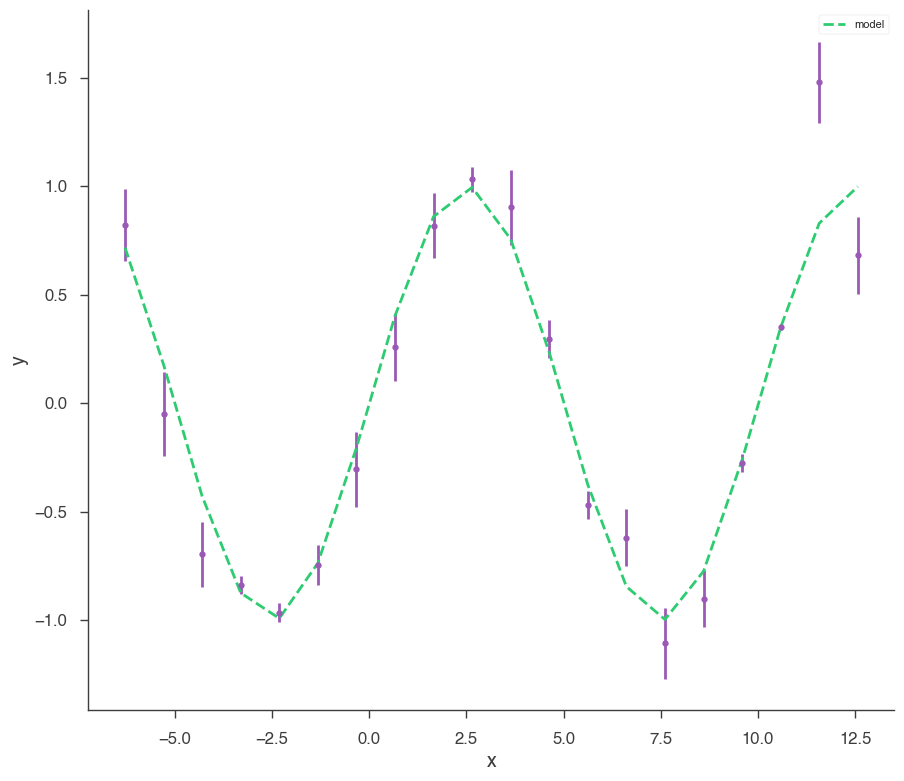

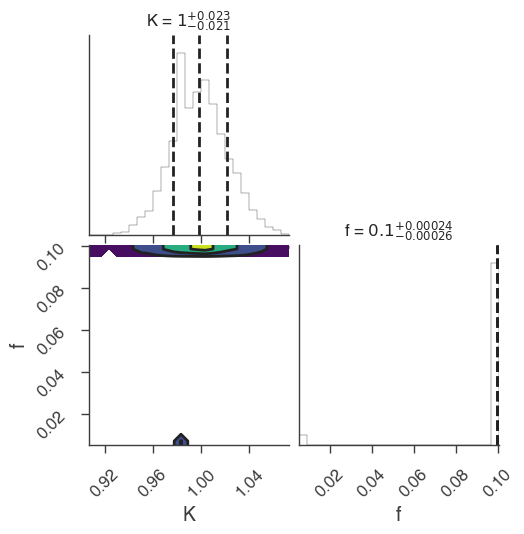

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

13:58:36 INFO      sampler set to multinest                                                ]8;id=938631;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=151129;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


 ln(ev)=  -25.205829462335611      +/-  0.14842327882345704     
 Total Likelihood Evaluations:         6127
 Sampling finished. Exiting MultiNest
  analysing data from chains/fit-.txt


13:58:38 INFO      fit restored to maximum of posterior                                         ]8;id=165047;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=922035;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=40483;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=184532;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.98 +/- 0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.988 +/- 0.024) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-15.421252
total,-15.421252


Values of statistical measures:

,statistical measures
AIC,35.548386
BIC,36.833968
DIC,34.717147
PDIC,1.936095
log(Z),-10.946753


         INFO      deleting the chain directory chains                                     ]8;id=414269;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=238613;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

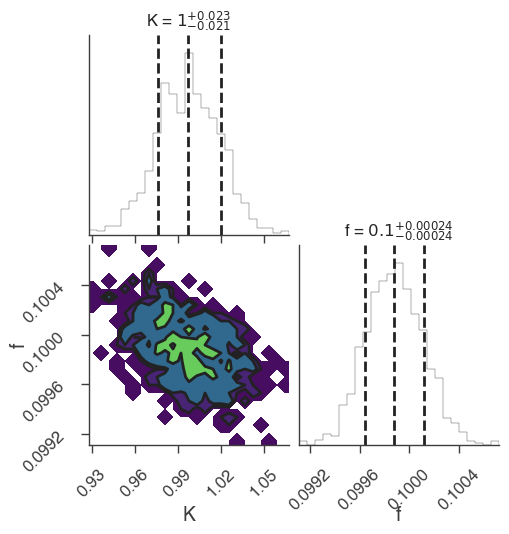

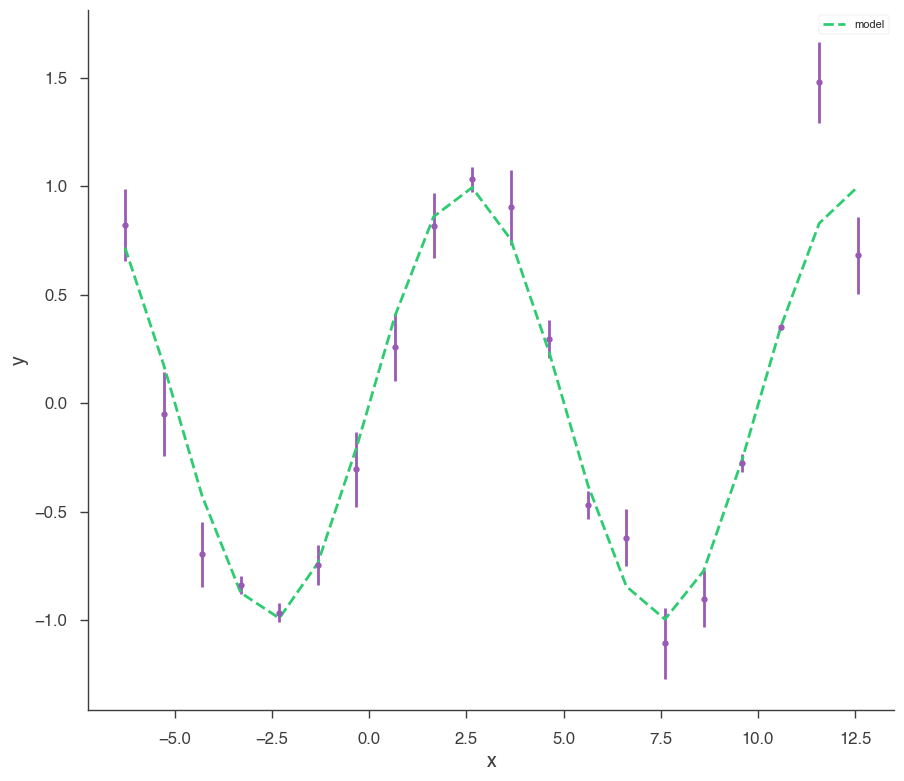

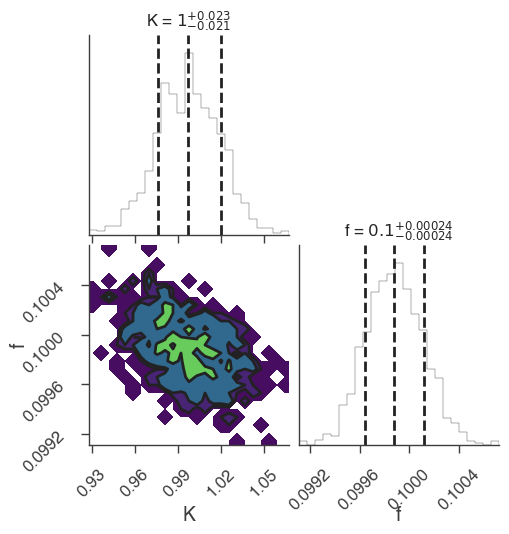

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

13:58:39 INFO      sampler set to dynesty_nested                                           ]8;id=383008;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=737583;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

155it [00:00, 1546.09it/s, bound: 0 | nc: 1 | ncall: 576 | eff(%): 26.910 | loglstar:   -inf < -3431.481 <    inf | logz: -3438.553 +/-  0.133 | dlogz: 3406.215 >  0.409]

310it [00:00, 1300.86it/s, bound: 0 | nc: 2 | ncall: 864 | eff(%): 35.880 | loglstar:   -inf < -2237.055 <    inf | logz: -2244.433 +/-  0.133 | dlogz: 2202.687 >  0.409]

443it [00:00, 1048.28it/s, bound: 0 | nc: 1 | ncall: 1178 | eff(%): 37.606 | loglstar:   -inf < -1755.146 <    inf | logz: -1762.622 +/-  0.132 | dlogz: 1720.318 >  0.409]

553it [00:00, 920.34it/s, bound: 0 | nc: 3 | ncall: 1576 | eff(%): 35.089 | loglstar:   -inf < -1438.965 <    inf | logz: -1445.911 +/-  0.129 | dlogz: 1402.292 >  0.409] 

649it [00:00, 808.44it/s, bound: 0 | nc: 10 | ncall: 1974 | eff(%): 32.877 | loglstar:   -inf < -1247.225 <    inf | logz: -1255.295 +/-  0.136 | dlogz: 1213.376 >  0.409]

733it [00:00, 665.01it/s, bound: 0 | nc: 12 | ncall: 2460 | eff(%): 29.797 | loglstar:   -inf < -1125.830 <    inf | logz: -1134.145 +/-  0.139 | dlogz: 1110.938 >  0.409]

804it [00:01, 593.95it/s, bound: 0 | nc: 20 | ncall: 2836 | eff(%): 28.350 | loglstar:   -inf < -1029.906 <    inf | logz: -1038.545 +/-  0.145 | dlogz: 1016.709 >  0.409]

866it [00:01, 474.45it/s, bound: 0 | nc: 9 | ncall: 3411 | eff(%): 25.388 | loglstar:   -inf < -970.587 <    inf | logz: -978.114 +/-  0.131 | dlogz: 953.156 >  0.409]    

918it [00:01, 357.27it/s, bound: 0 | nc: 5 | ncall: 3984 | eff(%): 23.042 | loglstar:   -inf < -937.401 <    inf | logz: -945.140 +/-  0.131 | dlogz: 919.991 >  0.409]

960it [00:01, 350.16it/s, bound: 0 | nc: 7 | ncall: 4334 | eff(%): 22.150 | loglstar:   -inf < -903.449 <    inf | logz: -911.512 +/-  0.133 | dlogz: 886.372 >  0.409]

999it [00:01, 299.60it/s, bound: 0 | nc: 26 | ncall: 4765 | eff(%): 20.965 | loglstar:   -inf < -884.980 <    inf | logz: -892.180 +/-  0.124 | dlogz: 866.522 >  0.409]

1032it [00:02, 238.29it/s, bound: 0 | nc: 7 | ncall: 5285 | eff(%): 19.527 | loglstar:   -inf < -873.801 <    inf | logz: -880.804 +/-  0.125 | dlogz: 854.992 >  0.409]

1059it [00:02, 219.82it/s, bound: 0 | nc: 15 | ncall: 5699 | eff(%): 18.582 | loglstar:   -inf < -856.507 <    inf | logz: -865.417 +/-  0.145 | dlogz: 841.056 >  0.409]

1083it [00:02, 185.45it/s, bound: 0 | nc: 31 | ncall: 6151 | eff(%): 17.607 | loglstar:   -inf < -826.268 <    inf | logz: -834.463 +/-  0.138 | dlogz: 809.032 >  0.409]

1103it [00:02, 170.32it/s, bound: 0 | nc: 2 | ncall: 6619 | eff(%): 16.664 | loglstar:   -inf < -805.254 <    inf | logz: -813.622 +/-  0.138 | dlogz: 795.559 >  0.409] 

1121it [00:02, 167.69it/s, bound: 0 | nc: 4 | ncall: 6988 | eff(%): 16.042 | loglstar:   -inf < -786.539 <    inf | logz: -794.573 +/-  0.136 | dlogz: 776.257 >  0.409]

1139it [00:02, 160.75it/s, bound: 0 | nc: 2 | ncall: 7274 | eff(%): 15.659 | loglstar:   -inf < -773.045 <    inf | logz: -781.278 +/-  0.138 | dlogz: 763.163 >  0.409]

1156it [00:03, 157.74it/s, bound: 0 | nc: 7 | ncall: 7546 | eff(%): 15.319 | loglstar:   -inf < -745.009 <    inf | logz: -754.570 +/-  0.154 | dlogz: 740.780 >  0.409]

1172it [00:03, 139.72it/s, bound: 0 | nc: 11 | ncall: 7877 | eff(%): 14.879 | loglstar:   -inf < -722.289 <    inf | logz: -731.569 +/-  0.146 | dlogz: 714.148 >  0.409]

1194it [00:03, 153.48it/s, bound: 0 | nc: 68 | ncall: 8152 | eff(%): 14.647 | loglstar:   -inf < -694.328 <    inf | logz: -703.787 +/-  0.149 | dlogz: 686.884 >  0.409]

1210it [00:03, 142.84it/s, bound: 0 | nc: 22 | ncall: 8466 | eff(%): 14.292 | loglstar:   -inf < -678.170 <    inf | logz: -686.332 +/-  0.138 | dlogz: 667.793 >  0.409]

1225it [00:03, 140.12it/s, bound: 0 | nc: 12 | ncall: 8744 | eff(%): 14.010 | loglstar:   -inf < -667.369 <    inf | logz: -675.293 +/-  0.137 | dlogz: 656.574 >  0.409]

1240it [00:03, 131.02it/s, bound: 0 | nc: 35 | ncall: 9085 | eff(%): 13.649 | loglstar:   -inf < -644.917 <    inf | logz: -654.274 +/-  0.147 | dlogz: 636.595 >  0.409]

1254it [00:03, 116.76it/s, bound: 0 | nc: 8 | ncall: 9420 | eff(%): 13.312 | loglstar:   -inf < -632.600 <    inf | logz: -641.910 +/-  0.146 | dlogz: 624.115 >  0.409] 

1268it [00:03, 116.65it/s, bound: 0 | nc: 105 | ncall: 9737 | eff(%): 13.022 | loglstar:   -inf < -624.942 <    inf | logz: -633.366 +/-  0.138 | dlogz: 614.705 >  0.409]

1280it [00:04, 114.96it/s, bound: 0 | nc: 3 | ncall: 9976 | eff(%): 12.831 | loglstar:   -inf < -615.082 <    inf | logz: -624.176 +/-  0.148 | dlogz: 606.219 >  0.409]  

1292it [00:04, 92.23it/s, bound: 0 | nc: 49 | ncall: 10392 | eff(%): 12.433 | loglstar:   -inf < -604.564 <    inf | logz: -613.771 +/-  0.143 | dlogz: 595.537 >  0.409]

1303it [00:04, 90.28it/s, bound: 0 | nc: 184 | ncall: 10802 | eff(%): 12.063 | loglstar:   -inf < -593.037 <    inf | logz: -601.642 +/-  0.142 | dlogz: 582.996 >  0.409]

1313it [00:04, 91.83it/s, bound: 0 | nc: 5 | ncall: 11020 | eff(%): 11.915 | loglstar:   -inf < -586.405 <    inf | logz: -594.880 +/-  0.141 | dlogz: 576.147 >  0.409]  

1323it [00:04, 90.44it/s, bound: 0 | nc: 11 | ncall: 11265 | eff(%): 11.744 | loglstar:   -inf < -573.791 <    inf | logz: -582.716 +/-  0.143 | dlogz: 564.177 >  0.409]

1333it [00:04, 90.76it/s, bound: 0 | nc: 39 | ncall: 11537 | eff(%): 11.554 | loglstar:   -inf < -556.677 <    inf | logz: -565.490 +/-  0.146 | dlogz: 546.944 >  0.409]

1343it [00:04, 84.61it/s, bound: 0 | nc: 56 | ncall: 11846 | eff(%): 11.337 | loglstar:   -inf < -546.629 <    inf | logz: -555.902 +/-  0.143 | dlogz: 537.394 >  0.409]

1352it [00:04, 75.53it/s, bound: 0 | nc: 5 | ncall: 12228 | eff(%): 11.057 | loglstar:   -inf < -533.140 <    inf | logz: -542.807 +/-  0.150 | dlogz: 525.026 >  0.409] 

1360it [00:05, 68.12it/s, bound: 0 | nc: 13 | ncall: 12556 | eff(%): 10.831 | loglstar:   -inf < -519.760 <    inf | logz: -529.491 +/-  0.150 | dlogz: 511.756 >  0.409]

1368it [00:05, 54.43it/s, bound: 0 | nc: 89 | ncall: 13191 | eff(%): 10.371 | loglstar:   -inf < -513.575 <    inf | logz: -522.342 +/-  0.141 | dlogz: 503.470 >  0.409]

1375it [00:05, 55.90it/s, bound: 0 | nc: 57 | ncall: 13435 | eff(%): 10.234 | loglstar:   -inf < -501.871 <    inf | logz: -511.103 +/-  0.147 | dlogz: 492.613 >  0.409]

1382it [00:05, 51.73it/s, bound: 0 | nc: 163 | ncall: 13920 | eff(%):  9.928 | loglstar:   -inf < -492.153 <    inf | logz: -501.894 +/-  0.149 | dlogz: 483.926 >  0.409]

1388it [00:05, 44.53it/s, bound: 1 | nc: 1 | ncall: 13926 | eff(%):  9.967 | loglstar:   -inf < -486.527 <    inf | logz: -495.645 +/-  0.143 | dlogz: 476.764 >  0.409]  

1490it [00:05, 243.96it/s, bound: 1 | nc: 3 | ncall: 14062 | eff(%): 10.596 | loglstar:   -inf < -367.374 <    inf | logz: -376.645 +/-  0.147 | dlogz: 357.761 >  0.409]

1568it [00:06, 364.11it/s, bound: 1 | nc: 4 | ncall: 14190 | eff(%): 11.050 | loglstar:   -inf < -302.531 <    inf | logz: -312.492 +/-  0.148 | dlogz: 293.504 >  0.409]

1644it [00:06, 460.08it/s, bound: 1 | nc: 4 | ncall: 14361 | eff(%): 11.448 | loglstar:   -inf < -261.745 <    inf | logz: -270.613 +/-  0.142 | dlogz: 250.770 >  0.409]

1705it [00:06, 497.58it/s, bound: 1 | nc: 4 | ncall: 14510 | eff(%): 11.751 | loglstar:   -inf < -233.362 <    inf | logz: -242.398 +/-  0.148 | dlogz: 222.448 >  0.409]

1762it [00:06, 371.91it/s, bound: 2 | nc: 1 | ncall: 14593 | eff(%): 12.074 | loglstar:   -inf < -208.833 <    inf | logz: -218.507 +/-  0.150 | dlogz: 198.585 >  0.409]

1879it [00:06, 542.93it/s, bound: 2 | nc: 5 | ncall: 14771 | eff(%): 12.721 | loglstar:   -inf < -162.090 <    inf | logz: -171.409 +/-  0.144 | dlogz: 151.349 >  0.409]

1951it [00:06, 584.29it/s, bound: 2 | nc: 3 | ncall: 14920 | eff(%): 13.076 | loglstar:   -inf < -139.986 <    inf | logz: -149.768 +/-  0.145 | dlogz: 129.554 >  0.409]

2020it [00:06, 585.77it/s, bound: 2 | nc: 1 | ncall: 15101 | eff(%): 13.377 | loglstar:   -inf < -120.911 <    inf | logz: -130.829 +/-  0.147 | dlogz: 110.470 >  0.409]

2086it [00:07, 427.03it/s, bound: 3 | nc: 2 | ncall: 15194 | eff(%): 13.729 | loglstar:   -inf < -108.709 <    inf | logz: -118.227 +/-  0.146 | dlogz: 97.659 >  0.409] 

2173it [00:07, 517.77it/s, bound: 3 | nc: 2 | ncall: 15329 | eff(%): 14.176 | loglstar:   -inf < -88.765 <    inf | logz: -98.515 +/-  0.149 | dlogz: 77.784 >  0.409]  

2277it [00:07, 636.01it/s, bound: 3 | nc: 1 | ncall: 15518 | eff(%): 14.673 | loglstar:   -inf < -73.558 <    inf | logz: -82.957 +/-  0.144 | dlogz: 61.867 >  0.409]

2358it [00:07, 678.54it/s, bound: 3 | nc: 1 | ncall: 15714 | eff(%): 15.006 | loglstar:   -inf < -63.472 <    inf | logz: -73.312 +/-  0.147 | dlogz: 52.050 >  0.409]

2436it [00:07, 507.62it/s, bound: 4 | nc: 1 | ncall: 15825 | eff(%): 15.393 | loglstar:   -inf < -55.201 <    inf | logz: -65.008 +/-  0.149 | dlogz: 43.531 >  0.409]

2520it [00:07, 577.49it/s, bound: 4 | nc: 1 | ncall: 15967 | eff(%): 15.783 | loglstar:   -inf < -48.154 <    inf | logz: -57.814 +/-  0.147 | dlogz: 36.091 >  0.409]

2590it [00:07, 605.55it/s, bound: 4 | nc: 2 | ncall: 16120 | eff(%): 16.067 | loglstar:   -inf < -42.661 <    inf | logz: -52.542 +/-  0.149 | dlogz: 30.648 >  0.409]

2660it [00:07, 615.83it/s, bound: 4 | nc: 5 | ncall: 16287 | eff(%): 16.332 | loglstar:   -inf < -37.662 <    inf | logz: -47.411 +/-  0.149 | dlogz: 25.323 >  0.409]

2729it [00:08, 422.54it/s, bound: 5 | nc: 1 | ncall: 16391 | eff(%): 16.649 | loglstar:   -inf < -33.806 <    inf | logz: -43.737 +/-  0.149 | dlogz: 21.477 >  0.409]

2855it [00:08, 586.89it/s, bound: 5 | nc: 3 | ncall: 16581 | eff(%): 17.219 | loglstar:   -inf < -28.473 <    inf | logz: -38.163 +/-  0.148 | dlogz: 15.640 >  0.409]

2957it [00:08, 680.82it/s, bound: 5 | nc: 3 | ncall: 16767 | eff(%): 17.636 | loglstar:   -inf < -25.455 <    inf | logz: -35.257 +/-  0.147 | dlogz: 12.474 >  0.409]

3041it [00:08, 482.38it/s, bound: 6 | nc: 1 | ncall: 16955 | eff(%): 17.936 | loglstar:   -inf < -23.466 <    inf | logz: -33.153 +/-  0.148 | dlogz: 10.155 >  0.409]

3190it [00:08, 669.54it/s, bound: 6 | nc: 3 | ncall: 17143 | eff(%): 18.608 | loglstar:   -inf < -21.045 <    inf | logz: -30.771 +/-  0.147 | dlogz:  7.403 >  0.409]

3282it [00:08, 699.83it/s, bound: 6 | nc: 1 | ncall: 17311 | eff(%): 18.959 | loglstar:   -inf < -19.921 <    inf | logz: -29.592 +/-  0.147 | dlogz:  5.992 >  0.409]

3372it [00:09, 744.69it/s, bound: 6 | nc: 3 | ncall: 17513 | eff(%): 19.254 | loglstar:   -inf < -19.061 <    inf | logz: -28.734 +/-  0.147 | dlogz:  4.912 >  0.409]

3461it [00:09, 573.92it/s, bound: 7 | nc: 1 | ncall: 17621 | eff(%): 19.641 | loglstar:   -inf < -18.313 <    inf | logz: -28.019 +/-  0.147 | dlogz:  3.984 >  0.409]

3582it [00:09, 702.13it/s, bound: 7 | nc: 4 | ncall: 17797 | eff(%): 20.127 | loglstar:   -inf < -17.451 <    inf | logz: -27.219 +/-  0.148 | dlogz:  2.918 >  0.409]

3669it [00:09, 706.25it/s, bound: 7 | nc: 2 | ncall: 17972 | eff(%): 20.415 | loglstar:   -inf < -17.092 <    inf | logz: -26.795 +/-  0.148 | dlogz:  2.322 >  0.409]

3752it [00:09, 481.84it/s, bound: 8 | nc: 1 | ncall: 18140 | eff(%): 20.684 | loglstar:   -inf < -16.722 <    inf | logz: -26.462 +/-  0.148 | dlogz:  1.850 >  0.409]

3853it [00:09, 576.00it/s, bound: 8 | nc: 2 | ncall: 18266 | eff(%): 21.094 | loglstar:   -inf < -16.450 <    inf | logz: -26.143 +/-  0.148 | dlogz:  1.392 >  0.409]

3978it [00:10, 713.37it/s, bound: 8 | nc: 3 | ncall: 18461 | eff(%): 21.548 | loglstar:   -inf < -16.191 <    inf | logz: -25.860 +/-  0.148 | dlogz:  0.981 >  0.409]

4069it [00:10, 756.29it/s, bound: 8 | nc: 8 | ncall: 18649 | eff(%): 21.819 | loglstar:   -inf < -16.036 <    inf | logz: -25.704 +/-  0.147 | dlogz:  0.759 >  0.409]

4160it [00:10, 519.37it/s, bound: 9 | nc: 1 | ncall: 18799 | eff(%): 22.129 | loglstar:   -inf < -15.914 <    inf | logz: -25.580 +/-  0.147 | dlogz:  0.587 >  0.409]

4272it [00:10, 629.93it/s, bound: 9 | nc: 1 | ncall: 18965 | eff(%): 22.526 | loglstar:   -inf < -15.783 <    inf | logz: -25.460 +/-  0.147 | dlogz:  0.429 >  0.409]

4289it [00:10, 401.25it/s, +400 | bound: 9 | nc: 1 | ncall: 19391 | eff(%): 24.691 | loglstar:   -inf < -15.421 <    inf | logz: -25.091 +/-  0.147 | dlogz:  0.001 >  0.409]

13:58:50 INFO      fit restored to maximum of posterior                                         ]8;id=976608;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=608488;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=647510;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=372021;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.99 -0.23 +0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.987 +/- 0.022) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-15.419948
total,-15.419948


Values of statistical measures:

,statistical measures
AIC,35.545779
BIC,36.831361
DIC,34.740829
PDIC,1.950510
log(Z),-10.896936


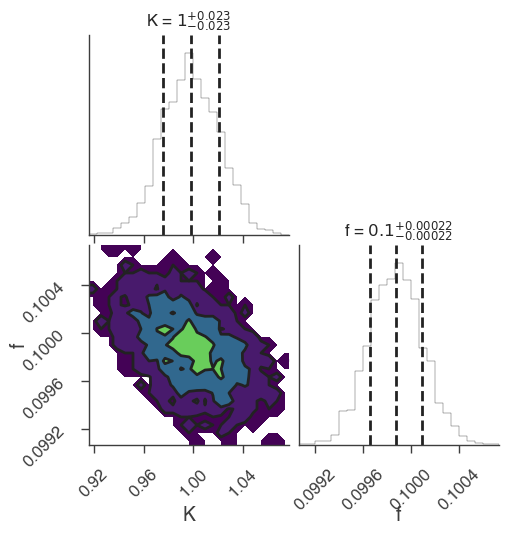

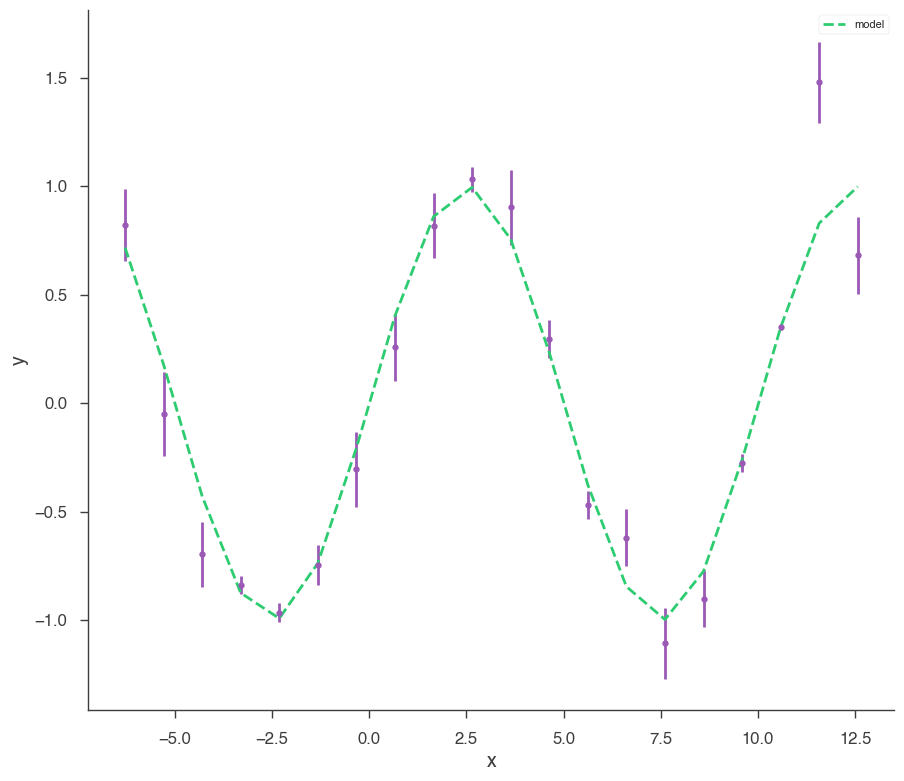

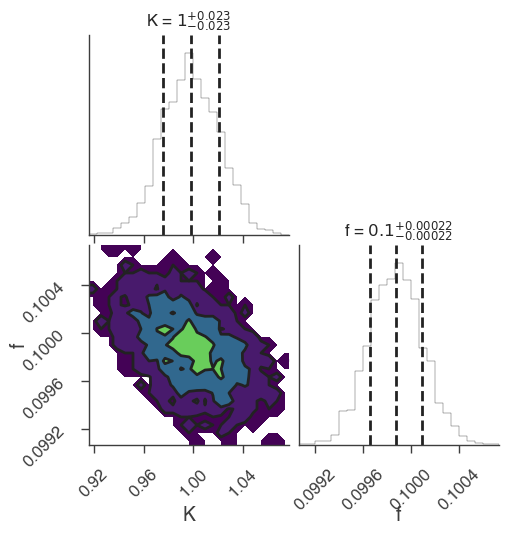

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

13:58:51 INFO      sampler set to dynesty_dynamic                                          ]8;id=418828;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=687395;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

13it [00:00, 129.49it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 13 | eff(%):  2.534 | loglstar:   -inf < -8539.069 <    inf | logz: -8546.003 +/-  0.118 | dlogz: 8539.131 >  0.010]

128it [00:00, 728.81it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 144 | eff(%): 19.876 | loglstar:   -inf < -3834.977 <    inf | logz: -3842.140 +/-  0.120 | dlogz: 3847.324 >  0.010]

257it [00:00, 984.46it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 330 | eff(%): 30.964 | loglstar:   -inf < -2856.780 <    inf | logz: -2863.536 +/-  0.110 | dlogz: 2840.580 >  0.010]

356it [00:00, 973.59it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 526 | eff(%): 34.698 | loglstar:   -inf < -2234.717 <    inf | logz: -2242.336 +/-  0.123 | dlogz: 2234.174 >  0.010]

454it [00:00, 919.18it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 743 | eff(%): 36.525 | loglstar:   -inf < -1891.814 <    inf | logz: -1899.555 +/-  0.122 | dlogz: 1878.409 >  0.010]

547it [00:00, 909.71it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 999 | eff(%): 36.491 | loglstar:   -inf < -1657.843 <    inf | logz: -1664.734 +/-  0.113 | dlogz: 1640.802 >  0.010]

639it [00:00, 838.67it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 1333 | eff(%): 34.861 | loglstar:   -inf < -1482.734 <    inf | logz: -1490.287 +/-  0.118 | dlogz: 1474.448 >  0.010]

724it [00:00, 714.04it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 1663 | eff(%): 33.472 | loglstar:   -inf < -1333.895 <    inf | logz: -1342.175 +/-  0.127 | dlogz: 1328.048 >  0.010] 

799it [00:01, 626.02it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2127 | eff(%): 30.415 | loglstar:   -inf < -1198.531 <    inf | logz: -1206.658 +/-  0.121 | dlogz: 1190.568 >  0.010]

865it [00:01, 525.42it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 2513 | eff(%): 28.709 | loglstar:   -inf < -1126.507 <    inf | logz: -1134.885 +/-  0.124 | dlogz: 1119.032 >  0.010]

922it [00:01, 516.63it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2807 | eff(%): 27.880 | loglstar:   -inf < -1079.031 <    inf | logz: -1086.278 +/-  0.114 | dlogz: 1069.025 >  0.010] 

977it [00:01, 461.36it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 3172 | eff(%): 26.607 | loglstar:   -inf < -1035.888 <    inf | logz: -1043.312 +/-  0.114 | dlogz: 1025.902 >  0.010]

1026it [00:01, 389.21it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 3552 | eff(%): 25.321 | loglstar:   -inf < -1003.797 <    inf | logz: -1011.328 +/-  0.112 | dlogz: 993.815 >  0.010]

1068it [00:01, 357.19it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 3854 | eff(%): 24.529 | loglstar:   -inf < -980.095 <    inf | logz: -987.270 +/-  0.116 | dlogz: 969.545 >  0.010]  

1106it [00:02, 315.92it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 4183 | eff(%): 23.617 | loglstar:   -inf < -961.123 <    inf | logz: -968.671 +/-  0.118 | dlogz: 951.059 >  0.010]

1140it [00:02, 254.85it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 4626 | eff(%): 22.240 | loglstar:   -inf < -939.477 <    inf | logz: -947.395 +/-  0.120 | dlogz: 929.935 >  0.010]

1168it [00:02, 249.01it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 4882 | eff(%): 21.702 | loglstar:   -inf < -927.122 <    inf | logz: -934.725 +/-  0.115 | dlogz: 916.864 >  0.010] 

1199it [00:02, 259.10it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 5116 | eff(%): 21.350 | loglstar:   -inf < -912.400 <    inf | logz: -920.841 +/-  0.122 | dlogz: 903.376 >  0.010]

1227it [00:02, 231.75it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 5431 | eff(%): 20.688 | loglstar:   -inf < -903.799 <    inf | logz: -910.932 +/-  0.112 | dlogz: 892.769 >  0.010] 

1252it [00:02, 221.39it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 5704 | eff(%): 20.181 | loglstar:   -inf < -895.762 <    inf | logz: -903.214 +/-  0.116 | dlogz: 885.115 >  0.010]

1275it [00:02, 203.49it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 6047 | eff(%): 19.475 | loglstar:   -inf < -888.559 <    inf | logz: -896.170 +/-  0.113 | dlogz: 877.992 >  0.010]

1296it [00:03, 194.24it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 6429 | eff(%): 18.704 | loglstar:   -inf < -884.836 <    inf | logz: -891.556 +/-  0.111 | dlogz: 873.172 >  0.010]

1316it [00:03, 184.40it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 6664 | eff(%): 18.370 | loglstar:   -inf < -880.108 <    inf | logz: -887.422 +/-  0.112 | dlogz: 869.085 >  0.010] 

1335it [00:03, 180.09it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 6905 | eff(%): 18.028 | loglstar:   -inf < -876.208 <    inf | logz: -883.912 +/-  0.113 | dlogz: 865.610 >  0.010]

1355it [00:03, 182.80it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 7115 | eff(%): 17.794 | loglstar:   -inf < -872.124 <    inf | logz: -879.346 +/-  0.113 | dlogz: 860.897 >  0.010]

1374it [00:03, 179.82it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 7345 | eff(%): 17.514 | loglstar:   -inf < -861.414 <    inf | logz: -869.833 +/-  0.123 | dlogz: 851.787 >  0.010] 

1392it [00:03, 157.14it/s, batch: 0 | bound: 0 | nc: 65 | ncall: 7708 | eff(%): 16.959 | loglstar:   -inf < -844.967 <    inf | logz: -854.450 +/-  0.133 | dlogz: 837.769 >  0.010]

1409it [00:03, 138.41it/s, batch: 0 | bound: 0 | nc: 51 | ncall: 8156 | eff(%): 16.278 | loglstar:   -inf < -833.503 <    inf | logz: -841.955 +/-  0.124 | dlogz: 823.844 >  0.010]

1424it [00:03, 137.55it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 8368 | eff(%): 16.058 | loglstar:   -inf < -825.313 <    inf | logz: -833.215 +/-  0.120 | dlogz: 814.801 >  0.010]

1439it [00:04, 139.24it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 8690 | eff(%): 15.658 | loglstar:   -inf < -812.221 <    inf | logz: -820.465 +/-  0.124 | dlogz: 802.146 >  0.010] 

1454it [00:04, 120.17it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 9119 | eff(%): 15.116 | loglstar:   -inf < -799.693 <    inf | logz: -808.649 +/-  0.125 | dlogz: 790.570 >  0.010]

1476it [00:04, 142.97it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 9434 | eff(%): 14.858 | loglstar:   -inf < -782.720 <    inf | logz: -791.965 +/-  0.128 | dlogz: 774.097 >  0.010] 

1492it [00:04, 127.26it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 9799 | eff(%): 14.487 | loglstar:   -inf < -775.844 <    inf | logz: -784.009 +/-  0.124 | dlogz: 765.536 >  0.010]

1506it [00:04, 121.74it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 10123 | eff(%): 14.177 | loglstar:   -inf < -763.655 <    inf | logz: -771.848 +/-  0.124 | dlogz: 753.325 >  0.010]

1519it [00:04, 120.24it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 10379 | eff(%): 13.963 | loglstar:   -inf < -750.587 <    inf | logz: -759.298 +/-  0.127 | dlogz: 740.990 >  0.010] 

1532it [00:04, 114.12it/s, batch: 0 | bound: 0 | nc: 42 | ncall: 10742 | eff(%): 13.627 | loglstar:   -inf < -737.143 <    inf | logz: -745.871 +/-  0.128 | dlogz: 727.670 >  0.010]

1544it [00:04, 105.93it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 11070 | eff(%): 13.345 | loglstar:   -inf < -727.526 <    inf | logz: -736.554 +/-  0.129 | dlogz: 718.462 >  0.010]

1560it [00:05, 119.24it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 11344 | eff(%): 13.171 | loglstar:   -inf < -712.810 <    inf | logz: -721.564 +/-  0.127 | dlogz: 703.097 >  0.010]

1574it [00:05, 122.34it/s, batch: 0 | bound: 0 | nc: 42 | ncall: 11644 | eff(%): 12.961 | loglstar:   -inf < -702.521 <    inf | logz: -711.472 +/-  0.125 | dlogz: 692.942 >  0.010]

1589it [00:05, 129.55it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 11849 | eff(%): 12.867 | loglstar:   -inf < -692.473 <    inf | logz: -701.696 +/-  0.126 | dlogz: 683.315 >  0.010] 

1603it [00:05, 124.31it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 12163 | eff(%): 12.659 | loglstar:   -inf < -678.559 <    inf | logz: -687.535 +/-  0.130 | dlogz: 669.273 >  0.010]

1616it [00:05, 98.37it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 12695 | eff(%): 12.247 | loglstar:   -inf < -667.586 <    inf | logz: -676.511 +/-  0.131 | dlogz: 658.227 >  0.010] 

1628it [00:05, 102.14it/s, batch: 0 | bound: 0 | nc: 78 | ncall: 12914 | eff(%): 12.137 | loglstar:   -inf < -661.548 <    inf | logz: -669.791 +/-  0.124 | dlogz: 650.920 >  0.010]

1640it [00:05, 99.92it/s, batch: 0 | bound: 0 | nc: 116 | ncall: 13212 | eff(%): 11.960 | loglstar:   -inf < -644.989 <    inf | logz: -654.205 +/-  0.132 | dlogz: 636.067 >  0.010]

1651it [00:05, 98.81it/s, batch: 0 | bound: 0 | nc: 61 | ncall: 13475 | eff(%): 11.814 | loglstar:   -inf < -638.623 <    inf | logz: -647.751 +/-  0.127 | dlogz: 629.165 >  0.010] 

1662it [00:06, 94.83it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 13765 | eff(%): 11.651 | loglstar:   -inf < -627.121 <    inf | logz: -636.552 +/-  0.135 | dlogz: 618.572 >  0.010] 

1674it [00:06, 99.96it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 14028 | eff(%): 11.523 | loglstar:   -inf < -611.714 <    inf | logz: -620.624 +/-  0.129 | dlogz: 602.076 >  0.010]

1685it [00:06, 99.03it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 14403 | eff(%): 11.306 | loglstar:   -inf < -602.792 <    inf | logz: -612.917 +/-  0.138 | dlogz: 595.787 >  0.010]

1696it [00:06, 97.25it/s, batch: 0 | bound: 0 | nc: 47 | ncall: 14708 | eff(%): 11.152 | loglstar:   -inf < -592.396 <    inf | logz: -600.868 +/-  0.126 | dlogz: 581.925 >  0.010]

1708it [00:06, 103.07it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 14920 | eff(%): 11.077 | loglstar:   -inf < -582.350 <    inf | logz: -592.462 +/-  0.137 | dlogz: 575.049 >  0.010]

1719it [00:06, 98.59it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 15179 | eff(%): 10.964 | loglstar:   -inf < -571.559 <    inf | logz: -581.444 +/-  0.134 | dlogz: 563.404 >  0.010]  

1729it [00:06, 83.12it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 15533 | eff(%): 10.784 | loglstar:   -inf < -565.030 <    inf | logz: -574.476 +/-  0.130 | dlogz: 555.931 >  0.010]

1741it [00:06, 91.05it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 15792 | eff(%): 10.686 | loglstar:   -inf < -550.011 <    inf | logz: -560.012 +/-  0.137 | dlogz: 542.297 >  0.010]

1751it [00:07, 90.31it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 16129 | eff(%): 10.530 | loglstar:   -inf < -541.448 <    inf | logz: -550.705 +/-  0.134 | dlogz: 532.245 >  0.010]

1762it [00:07, 93.17it/s, batch: 0 | bound: 0 | nc: 55 | ncall: 16487 | eff(%): 10.373 | loglstar:   -inf < -529.494 <    inf | logz: -538.499 +/-  0.131 | dlogz: 519.662 >  0.010]

1772it [00:07, 90.82it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 16745 | eff(%): 10.275 | loglstar:   -inf < -522.770 <    inf | logz: -532.386 +/-  0.131 | dlogz: 513.812 >  0.010]

1782it [00:07, 72.60it/s, batch: 0 | bound: 0 | nc: 57 | ncall: 17220 | eff(%): 10.056 | loglstar:   -inf < -509.747 <    inf | logz: -519.639 +/-  0.135 | dlogz: 501.281 >  0.010]

1790it [00:07, 49.03it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17384 | eff(%): 10.009 | loglstar:   -inf < -501.128 <    inf | logz: -511.133 +/-  0.138 | dlogz: 493.244 >  0.010] 

1872it [00:07, 186.01it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17489 | eff(%): 10.406 | loglstar:   -inf < -406.406 <    inf | logz: -416.567 +/-  0.136 | dlogz: 398.120 >  0.010]

1959it [00:07, 324.12it/s, batch: 0 | bound: 1 | nc: 6 | ncall: 17657 | eff(%): 10.789 | loglstar:   -inf < -327.502 <    inf | logz: -337.748 +/-  0.138 | dlogz: 319.188 >  0.010]

2042it [00:08, 437.15it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17828 | eff(%): 11.141 | loglstar:   -inf < -272.954 <    inf | logz: -281.956 +/-  0.128 | dlogz: 262.212 >  0.010]

2124it [00:08, 527.92it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 18014 | eff(%): 11.472 | loglstar:   -inf < -246.843 <    inf | logz: -255.574 +/-  0.127 | dlogz: 235.581 >  0.010]

2189it [00:08, 363.82it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18145 | eff(%): 11.740 | loglstar:   -inf < -223.791 <    inf | logz: -233.477 +/-  0.133 | dlogz: 213.673 >  0.010]

2284it [00:08, 475.86it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18271 | eff(%): 12.168 | loglstar:   -inf < -196.928 <    inf | logz: -206.508 +/-  0.133 | dlogz: 186.365 >  0.010]

2373it [00:08, 564.93it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18404 | eff(%): 12.553 | loglstar:   -inf < -173.074 <    inf | logz: -182.925 +/-  0.132 | dlogz: 162.552 >  0.010]

2468it [00:08, 655.04it/s, batch: 0 | bound: 2 | nc: 6 | ncall: 18587 | eff(%): 12.930 | loglstar:   -inf < -149.073 <    inf | logz: -159.257 +/-  0.135 | dlogz: 139.203 >  0.010]

2547it [00:08, 664.79it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 18768 | eff(%): 13.219 | loglstar:   -inf < -131.246 <    inf | logz: -141.000 +/-  0.133 | dlogz: 120.646 >  0.010]

2623it [00:09, 418.79it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18915 | eff(%): 13.510 | loglstar:   -inf < -118.187 <    inf | logz: -127.750 +/-  0.134 | dlogz: 107.185 >  0.010]

2745it [00:09, 564.56it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19079 | eff(%): 14.020 | loglstar:   -inf < -96.513 <    inf | logz: -106.823 +/-  0.134 | dlogz: 86.091 >  0.010]  

2832it [00:09, 626.56it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19220 | eff(%): 14.361 | loglstar:   -inf < -86.960 <    inf | logz: -96.478 +/-  0.132 | dlogz: 75.430 >  0.010] 

2913it [00:09, 661.80it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19369 | eff(%): 14.661 | loglstar:   -inf < -76.975 <    inf | logz: -86.545 +/-  0.132 | dlogz: 65.327 >  0.010]

2993it [00:09, 680.96it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19554 | eff(%): 14.925 | loglstar:   -inf < -69.473 <    inf | logz: -79.323 +/-  0.133 | dlogz: 57.958 >  0.010]

3071it [00:10, 446.60it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19692 | eff(%): 15.209 | loglstar:   -inf < -63.242 <    inf | logz: -72.895 +/-  0.133 | dlogz: 51.342 >  0.010]

3177it [00:10, 560.35it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19837 | eff(%): 15.622 | loglstar:   -inf < -55.060 <    inf | logz: -64.745 +/-  0.133 | dlogz: 42.970 >  0.010]

3267it [00:10, 631.47it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 19980 | eff(%): 15.952 | loglstar:   -inf < -48.914 <    inf | logz: -59.037 +/-  0.134 | dlogz: 37.095 >  0.010]

3350it [00:10, 677.05it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20133 | eff(%): 16.236 | loglstar:   -inf < -44.762 <    inf | logz: -54.444 +/-  0.133 | dlogz: 32.305 >  0.010]

3431it [00:10, 680.67it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 20316 | eff(%): 16.483 | loglstar:   -inf < -39.915 <    inf | logz: -50.052 +/-  0.135 | dlogz: 27.766 >  0.010]

3508it [00:10, 452.05it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20433 | eff(%): 16.758 | loglstar:   -inf < -36.540 <    inf | logz: -46.685 +/-  0.134 | dlogz: 24.237 >  0.010]

3601it [00:10, 542.26it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20550 | eff(%): 17.107 | loglstar:   -inf < -32.791 <    inf | logz: -42.867 +/-  0.135 | dlogz: 20.272 >  0.010]

3686it [00:10, 607.34it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20690 | eff(%): 17.395 | loglstar:   -inf < -30.117 <    inf | logz: -40.057 +/-  0.135 | dlogz: 17.284 >  0.010]

3769it [00:11, 657.93it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20829 | eff(%): 17.671 | loglstar:   -inf < -27.773 <    inf | logz: -37.757 +/-  0.135 | dlogz: 14.826 >  0.010]

3860it [00:11, 719.75it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21023 | eff(%): 17.934 | loglstar:   -inf < -25.540 <    inf | logz: -35.662 +/-  0.135 | dlogz: 12.549 >  0.010]

3942it [00:11, 458.64it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21180 | eff(%): 18.183 | loglstar:   -inf < -23.850 <    inf | logz: -33.942 +/-  0.135 | dlogz: 10.661 >  0.010]

4043it [00:11, 561.61it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21310 | eff(%): 18.537 | loglstar:   -inf < -22.358 <    inf | logz: -32.337 +/-  0.135 | dlogz:  8.849 >  0.010]

4133it [00:11, 632.49it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21440 | eff(%): 18.838 | loglstar:   -inf < -21.171 <    inf | logz: -31.223 +/-  0.134 | dlogz:  7.555 >  0.010]

4237it [00:11, 725.19it/s, batch: 0 | bound: 6 | nc: 5 | ncall: 21626 | eff(%): 19.149 | loglstar:   -inf < -20.107 <    inf | logz: -30.119 +/-  0.134 | dlogz:  6.242 >  0.010]

4324it [00:11, 740.06it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21804 | eff(%): 19.387 | loglstar:   -inf < -19.372 <    inf | logz: -29.365 +/-  0.134 | dlogz:  5.316 >  0.010]

4408it [00:12, 476.09it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21952 | eff(%): 19.633 | loglstar:   -inf < -18.847 <    inf | logz: -28.781 +/-  0.134 | dlogz:  4.567 >  0.010]

4506it [00:12, 569.44it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22089 | eff(%): 19.948 | loglstar:   -inf < -18.318 <    inf | logz: -28.241 +/-  0.134 | dlogz:  3.842 >  0.010]

4601it [00:12, 647.73it/s, batch: 0 | bound: 7 | nc: 5 | ncall: 22253 | eff(%): 20.222 | loglstar:   -inf < -17.837 <    inf | logz: -27.797 +/-  0.134 | dlogz:  3.226 >  0.010]

4696it [00:12, 716.43it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22431 | eff(%): 20.479 | loglstar:   -inf < -17.381 <    inf | logz: -27.414 +/-  0.134 | dlogz:  2.683 >  0.010]

4782it [00:12, 697.30it/s, batch: 0 | bound: 7 | nc: 7 | ncall: 22630 | eff(%): 20.674 | loglstar:   -inf < -17.048 <    inf | logz: -27.103 +/-  0.134 | dlogz:  2.241 >  0.010]

4862it [00:12, 502.86it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22733 | eff(%): 20.927 | loglstar:   -inf < -16.764 <    inf | logz: -26.855 +/-  0.134 | dlogz:  1.886 >  0.010]

4952it [00:13, 580.01it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22863 | eff(%): 21.196 | loglstar:   -inf < -16.565 <    inf | logz: -26.619 +/-  0.134 | dlogz:  1.546 >  0.010]

5031it [00:13, 625.94it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23002 | eff(%): 21.407 | loglstar:   -inf < -16.399 <    inf | logz: -26.449 +/-  0.134 | dlogz:  1.297 >  0.010]

5123it [00:13, 694.61it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23197 | eff(%): 21.619 | loglstar:   -inf < -16.210 <    inf | logz: -26.280 +/-  0.134 | dlogz:  1.054 >  0.010]

5203it [00:13, 438.30it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23398 | eff(%): 21.772 | loglstar:   -inf < -16.111 <    inf | logz: -26.156 +/-  0.134 | dlogz:  0.878 >  0.010]

5306it [00:13, 544.79it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23516 | eff(%): 22.094 | loglstar:   -inf < -15.996 <    inf | logz: -26.026 +/-  0.134 | dlogz:  0.695 >  0.010]

5400it [00:13, 624.46it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23643 | eff(%): 22.367 | loglstar:   -inf < -15.892 <    inf | logz: -25.930 +/-  0.134 | dlogz:  0.563 >  0.010]

5485it [00:13, 674.15it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 23780 | eff(%): 22.591 | loglstar:   -inf < -15.808 <    inf | logz: -25.856 +/-  0.134 | dlogz:  0.465 >  0.010]

5567it [00:14, 700.47it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23920 | eff(%): 22.797 | loglstar:   -inf < -15.745 <    inf | logz: -25.795 +/-  0.134 | dlogz:  0.387 >  0.010]

5648it [00:14, 720.68it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24106 | eff(%): 22.954 | loglstar:   -inf < -15.693 <    inf | logz: -25.744 +/-  0.134 | dlogz:  0.324 >  0.010]

5728it [00:14, 472.23it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24215 | eff(%): 23.176 | loglstar:   -inf < -15.656 <    inf | logz: -25.701 +/-  0.134 | dlogz:  0.272 >  0.010]

5868it [00:14, 652.06it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24393 | eff(%): 23.573 | loglstar:   -inf < -15.597 <    inf | logz: -25.641 +/-  0.134 | dlogz:  0.201 >  0.010]

5975it [00:14, 740.93it/s, batch: 0 | bound: 10 | nc: 7 | ncall: 24595 | eff(%): 23.810 | loglstar:   -inf < -15.558 <    inf | logz: -25.605 +/-  0.134 | dlogz:  0.160 >  0.010]

6067it [00:14, 780.23it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24800 | eff(%): 23.980 | loglstar:   -inf < -15.536 <    inf | logz: -25.579 +/-  0.134 | dlogz:  0.132 >  0.010]

6159it [00:15, 519.41it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24957 | eff(%): 24.194 | loglstar:   -inf < -15.514 <    inf | logz: -25.558 +/-  0.134 | dlogz:  0.109 >  0.010]

6257it [00:15, 604.51it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25094 | eff(%): 24.447 | loglstar:   -inf < -15.500 <    inf | logz: -25.540 +/-  0.134 | dlogz:  0.089 >  0.010]

6345it [00:15, 659.90it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 25237 | eff(%): 24.653 | loglstar:   -inf < -15.487 <    inf | logz: -25.526 +/-  0.134 | dlogz:  0.074 >  0.010]

6427it [00:15, 684.91it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25401 | eff(%): 24.814 | loglstar:   -inf < -15.476 <    inf | logz: -25.515 +/-  0.134 | dlogz:  0.062 >  0.010]

6532it [00:15, 773.67it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25613 | eff(%): 25.014 | loglstar:   -inf < -15.467 <    inf | logz: -25.504 +/-  0.134 | dlogz:  0.050 >  0.010]

6620it [00:15, 517.85it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 25721 | eff(%): 25.247 | loglstar:   -inf < -15.459 <    inf | logz: -25.496 +/-  0.134 | dlogz:  0.042 >  0.010]

6716it [00:15, 602.96it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 25849 | eff(%): 25.489 | loglstar:   -inf < -15.452 <    inf | logz: -25.489 +/-  0.134 | dlogz:  0.035 >  0.010]

6834it [00:15, 726.93it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 26044 | eff(%): 25.746 | loglstar:   -inf < -15.445 <    inf | logz: -25.482 +/-  0.134 | dlogz:  0.027 >  0.010]

6924it [00:16, 728.23it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26228 | eff(%): 25.905 | loglstar:   -inf < -15.441 <    inf | logz: -25.477 +/-  0.134 | dlogz:  0.023 >  0.010]

7009it [00:16, 490.58it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26405 | eff(%): 26.051 | loglstar:   -inf < -15.438 <    inf | logz: -25.474 +/-  0.134 | dlogz:  0.019 >  0.010]

7109it [00:16, 583.14it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26535 | eff(%): 26.296 | loglstar:   -inf < -15.434 <    inf | logz: -25.470 +/-  0.134 | dlogz:  0.016 >  0.010]

7213it [00:16, 676.72it/s, batch: 0 | bound: 13 | nc: 3 | ncall: 26698 | eff(%): 26.520 | loglstar:   -inf < -15.432 <    inf | logz: -25.467 +/-  0.134 | dlogz:  0.013 >  0.010]

7298it [00:16, 691.59it/s, batch: 0 | bound: 13 | nc: 3 | ncall: 26878 | eff(%): 26.656 | loglstar:   -inf < -15.430 <    inf | logz: -25.465 +/-  0.134 | dlogz:  0.011 >  0.010]

7577it [00:16, 1193.44it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27193 | eff(%): 27.607 | loglstar:   -inf < -15.424 <    inf | logz: -25.460 +/-  0.134 | dlogz:  0.005 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7830it [00:17, 571.80it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27446 | eff(%): 28.529 | loglstar: -17.258 < -16.810 < -15.951 | logz: -25.455 +/-  0.138 | stop:  1.378]          

7939it [00:18, 382.24it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27573 | eff(%): 28.256 | loglstar: -17.258 < -16.847 < -15.951 | logz: -25.455 +/-  0.138 | stop:  1.378]

8020it [00:18, 413.01it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27690 | eff(%): 28.426 | loglstar: -17.258 < -16.645 < -15.951 | logz: -25.455 +/-  0.138 | stop:  1.378]

8097it [00:18, 443.21it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27810 | eff(%): 28.577 | loglstar: -17.258 < -16.466 < -15.951 | logz: -25.455 +/-  0.138 | stop:  1.378]

8170it [00:18, 469.71it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27948 | eff(%): 28.695 | loglstar: -17.258 < -16.312 < -15.951 | logz: -25.455 +/-  0.138 | stop:  1.378]

8239it [00:18, 491.21it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 28090 | eff(%): 28.794 | loglstar: -17.258 < -16.185 < -15.951 | logz: -25.455 +/-  0.138 | stop:  1.378]

8305it [00:19, 356.20it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28230 | eff(%): 28.883 | loglstar: -17.258 < -16.064 < -15.951 | logz: -25.455 +/-  0.138 | stop:  1.378]

8366it [00:19, 393.99it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28304 | eff(%): 29.020 | loglstar: -17.258 < -15.991 < -15.951 | logz: -25.455 +/-  0.138 | stop:  1.378]

8566it [00:19, 679.12it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28527 | eff(%): 29.665 | loglstar: -17.258 < -15.779 < -15.951 | logz: -25.455 +/-  0.138 | stop:  1.378]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8903it [00:20, 429.49it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28876 | eff(%): 30.832 | loglstar: -17.657 < -16.923 < -17.252 | logz: -25.446 +/-  0.114 | stop:  1.029]

8982it [00:20, 321.17it/s, batch: 2 | bound: 2 | nc: 2 | ncall: 28964 | eff(%): 30.413 | loglstar: -17.657 < -17.341 < -17.252 | logz: -25.446 +/-  0.114 | stop:  1.029]

9310it [00:20, 568.75it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29339 | eff(%): 31.494 | loglstar: -17.657 < -16.145 < -17.252 | logz: -25.446 +/-  0.114 | stop:  1.029]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9503it [00:21, 432.02it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29561 | eff(%): 32.147 | loglstar: -17.657 < -15.426 < -17.252 | logz: -25.446 +/-  0.114 | stop:  0.906]

9503it [00:21, 437.70it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29561 | eff(%): 32.147 | loglstar: -17.657 < -15.426 < -17.252 | logz: -25.446 +/-  0.114 | stop:  0.906]

13:59:14 INFO      fit restored to maximum of posterior                                         ]8;id=698543;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=917799;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=890500;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=737171;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.99 -0.23 +0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.987 -0.022 +0.023) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-15.419504
total,-15.419504


Values of statistical measures:

,statistical measures
AIC,35.544891
BIC,36.830473
DIC,34.839130
PDIC,1.999222
log(Z),-11.059148


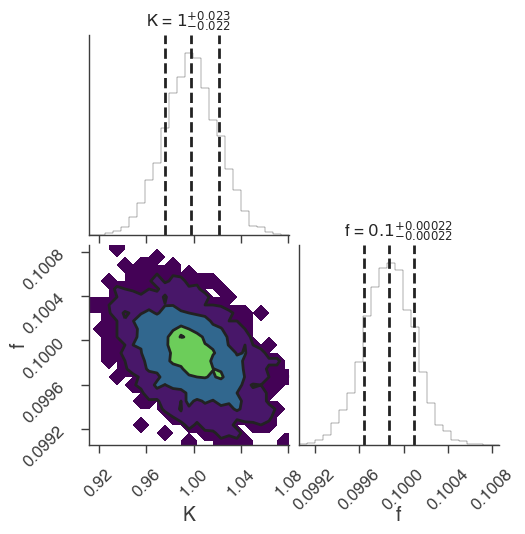

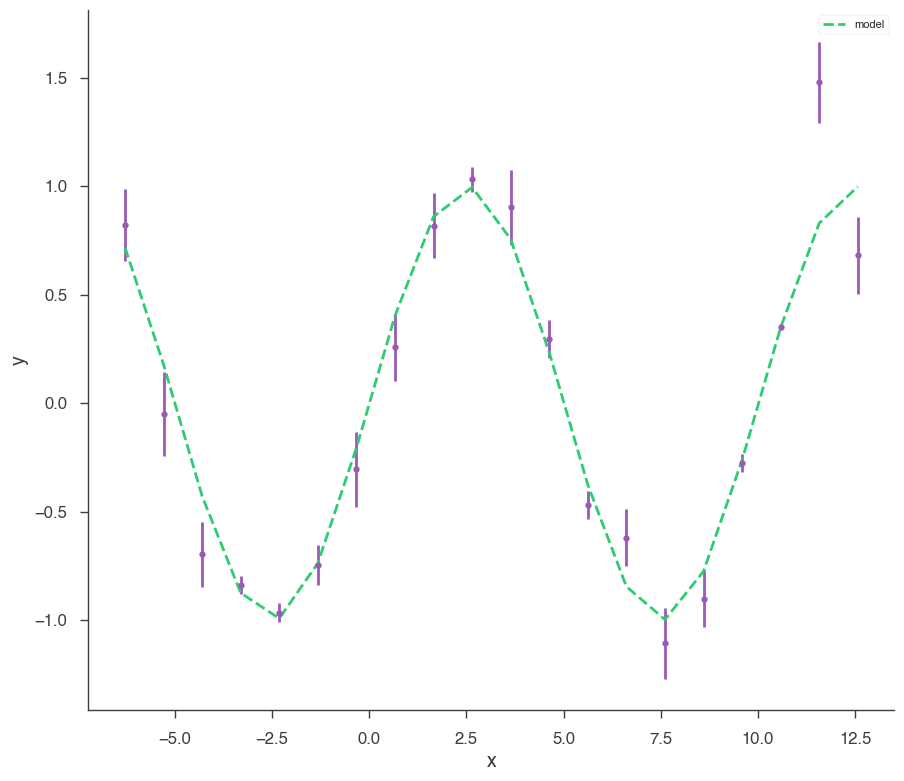

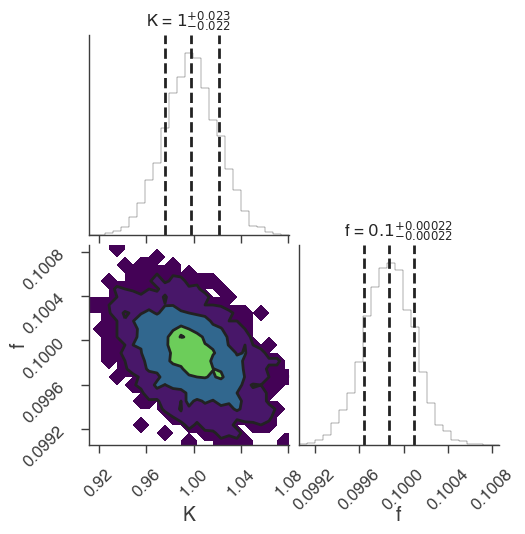

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

13:59:15 INFO      sampler set to zeus                                                     ]8;id=501646;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=279089;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:18, 33.23it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:17, 35.01it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:18, 32.29it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:18, 32.88it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:18, 32.12it/s]

Sampling progress :   4%|▍         | 24/625 [00:00<00:17, 33.99it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:17, 34.14it/s]

Sampling progress :   5%|▌         | 32/625 [00:00<00:17, 34.81it/s]

Sampling progress :   6%|▌         | 36/625 [00:01<00:17, 33.61it/s]

Sampling progress :   6%|▋         | 40/625 [00:01<00:17, 33.75it/s]

Sampling progress :   7%|▋         | 44/625 [00:01<00:17, 32.68it/s]

Sampling progress :   8%|▊         | 49/625 [00:01<00:16, 35.21it/s]

Sampling progress :   8%|▊         | 53/625 [00:01<00:16, 34.77it/s]

Sampling progress :   9%|▉         | 57/625 [00:01<00:16, 33.74it/s]

Sampling progress :  10%|▉         | 61/625 [00:01<00:19, 29.52it/s]

Sampling progress :  10%|█         | 65/625 [00:01<00:18, 30.98it/s]

Sampling progress :  11%|█         | 69/625 [00:02<00:16, 33.17it/s]

Sampling progress :  12%|█▏        | 73/625 [00:02<00:16, 34.28it/s]

Sampling progress :  12%|█▏        | 78/625 [00:02<00:14, 36.57it/s]

Sampling progress :  13%|█▎        | 82/625 [00:02<00:15, 34.88it/s]

Sampling progress :  14%|█▍        | 86/625 [00:02<00:15, 34.78it/s]

Sampling progress :  14%|█▍        | 90/625 [00:02<00:15, 34.60it/s]

Sampling progress :  15%|█▌        | 95/625 [00:02<00:14, 36.49it/s]

Sampling progress :  16%|█▌        | 99/625 [00:02<00:15, 33.51it/s]

Sampling progress :  16%|█▋        | 103/625 [00:03<00:15, 34.61it/s]

Sampling progress :  17%|█▋        | 107/625 [00:03<00:15, 34.22it/s]

Sampling progress :  18%|█▊        | 111/625 [00:03<00:15, 33.51it/s]

Sampling progress :  18%|█▊        | 115/625 [00:03<00:15, 32.62it/s]

Sampling progress :  19%|█▉        | 119/625 [00:03<00:15, 33.22it/s]

Sampling progress :  20%|█▉        | 123/625 [00:03<00:15, 32.36it/s]

Sampling progress :  20%|██        | 127/625 [00:03<00:15, 31.48it/s]

Sampling progress :  21%|██        | 131/625 [00:03<00:15, 32.06it/s]

Sampling progress :  22%|██▏       | 135/625 [00:04<00:15, 32.24it/s]

Sampling progress :  22%|██▏       | 139/625 [00:04<00:15, 31.19it/s]

Sampling progress :  23%|██▎       | 143/625 [00:04<00:14, 33.33it/s]

Sampling progress :  24%|██▎       | 147/625 [00:04<00:13, 34.65it/s]

Sampling progress :  24%|██▍       | 151/625 [00:04<00:13, 34.82it/s]

Sampling progress :  25%|██▍       | 155/625 [00:04<00:14, 32.92it/s]

Sampling progress :  25%|██▌       | 159/625 [00:04<00:14, 32.58it/s]

Sampling progress :  26%|██▌       | 163/625 [00:04<00:14, 32.54it/s]

Sampling progress :  27%|██▋       | 167/625 [00:05<00:14, 31.68it/s]

Sampling progress :  27%|██▋       | 171/625 [00:05<00:14, 32.02it/s]

Sampling progress :  28%|██▊       | 175/625 [00:05<00:14, 32.07it/s]

Sampling progress :  29%|██▊       | 179/625 [00:05<00:13, 31.99it/s]

Sampling progress :  29%|██▉       | 183/625 [00:05<00:13, 31.92it/s]

Sampling progress :  30%|██▉       | 187/625 [00:05<00:13, 32.22it/s]

Sampling progress :  31%|███       | 191/625 [00:05<00:13, 32.22it/s]

Sampling progress :  31%|███       | 195/625 [00:05<00:13, 31.84it/s]

Sampling progress :  32%|███▏      | 199/625 [00:06<00:13, 31.86it/s]

Sampling progress :  32%|███▏      | 203/625 [00:06<00:13, 32.07it/s]

Sampling progress :  33%|███▎      | 207/625 [00:06<00:12, 32.68it/s]

Sampling progress :  34%|███▍      | 211/625 [00:06<00:12, 32.27it/s]

Sampling progress :  34%|███▍      | 215/625 [00:06<00:12, 33.12it/s]

Sampling progress :  35%|███▌      | 219/625 [00:06<00:12, 32.17it/s]

Sampling progress :  36%|███▌      | 223/625 [00:06<00:12, 32.56it/s]

Sampling progress :  36%|███▋      | 227/625 [00:06<00:11, 33.42it/s]

Sampling progress :  37%|███▋      | 231/625 [00:06<00:11, 34.18it/s]

Sampling progress :  38%|███▊      | 235/625 [00:07<00:11, 34.19it/s]

Sampling progress :  38%|███▊      | 239/625 [00:07<00:11, 34.85it/s]

Sampling progress :  39%|███▉      | 243/625 [00:07<00:11, 32.97it/s]

Sampling progress :  40%|███▉      | 247/625 [00:07<00:11, 32.58it/s]

Sampling progress :  40%|████      | 251/625 [00:07<00:12, 30.38it/s]

Sampling progress :  41%|████      | 255/625 [00:07<00:12, 30.81it/s]

Sampling progress :  41%|████▏     | 259/625 [00:07<00:11, 31.60it/s]

Sampling progress :  42%|████▏     | 263/625 [00:07<00:11, 31.93it/s]

Sampling progress :  43%|████▎     | 267/625 [00:08<00:10, 33.06it/s]

Sampling progress :  43%|████▎     | 271/625 [00:08<00:10, 32.27it/s]

Sampling progress :  44%|████▍     | 275/625 [00:08<00:11, 31.75it/s]

Sampling progress :  45%|████▍     | 279/625 [00:08<00:11, 31.27it/s]

Sampling progress :  45%|████▌     | 283/625 [00:08<00:10, 31.22it/s]

Sampling progress :  46%|████▌     | 287/625 [00:08<00:10, 31.21it/s]

Sampling progress :  47%|████▋     | 291/625 [00:08<00:10, 31.24it/s]

Sampling progress :  47%|████▋     | 295/625 [00:08<00:10, 31.06it/s]

Sampling progress :  48%|████▊     | 299/625 [00:09<00:10, 31.40it/s]

Sampling progress :  48%|████▊     | 303/625 [00:09<00:10, 30.68it/s]

Sampling progress :  49%|████▉     | 307/625 [00:09<00:10, 31.46it/s]

Sampling progress :  50%|████▉     | 311/625 [00:09<00:10, 30.64it/s]

Sampling progress :  50%|█████     | 315/625 [00:09<00:10, 30.64it/s]

Sampling progress :  51%|█████     | 319/625 [00:09<00:10, 30.33it/s]

Sampling progress :  52%|█████▏    | 323/625 [00:09<00:09, 31.59it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:10<00:09, 32.58it/s]

Sampling progress :  53%|█████▎    | 331/625 [00:10<00:08, 33.55it/s]

Sampling progress :  54%|█████▎    | 335/625 [00:10<00:08, 32.70it/s]

Sampling progress :  54%|█████▍    | 339/625 [00:10<00:09, 31.51it/s]

Sampling progress :  55%|█████▍    | 343/625 [00:10<00:08, 32.23it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:10<00:08, 32.71it/s]

Sampling progress :  56%|█████▌    | 351/625 [00:10<00:08, 31.14it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:10<00:08, 31.51it/s]

Sampling progress :  57%|█████▋    | 359/625 [00:11<00:08, 31.77it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:11<00:08, 32.57it/s]

Sampling progress :  59%|█████▊    | 367/625 [00:11<00:08, 32.02it/s]

Sampling progress :  59%|█████▉    | 371/625 [00:11<00:08, 29.67it/s]

Sampling progress :  60%|██████    | 375/625 [00:11<00:07, 31.88it/s]

Sampling progress :  61%|██████    | 379/625 [00:11<00:07, 32.18it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:11<00:07, 33.56it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:11<00:06, 35.86it/s]

Sampling progress :  63%|██████▎   | 392/625 [00:11<00:06, 35.15it/s]

Sampling progress :  63%|██████▎   | 396/625 [00:12<00:06, 33.83it/s]

Sampling progress :  64%|██████▍   | 400/625 [00:12<00:06, 34.12it/s]

Sampling progress :  65%|██████▍   | 404/625 [00:12<00:06, 33.81it/s]

Sampling progress :  65%|██████▌   | 408/625 [00:12<00:06, 34.49it/s]

Sampling progress :  66%|██████▌   | 412/625 [00:12<00:06, 33.43it/s]

Sampling progress :  67%|██████▋   | 416/625 [00:12<00:06, 33.82it/s]

Sampling progress :  67%|██████▋   | 420/625 [00:12<00:06, 31.59it/s]

Sampling progress :  68%|██████▊   | 424/625 [00:12<00:06, 31.13it/s]

Sampling progress :  68%|██████▊   | 428/625 [00:13<00:06, 30.79it/s]

Sampling progress :  69%|██████▉   | 432/625 [00:13<00:06, 31.07it/s]

Sampling progress :  70%|██████▉   | 436/625 [00:13<00:06, 30.92it/s]

Sampling progress :  70%|███████   | 440/625 [00:13<00:06, 30.37it/s]

Sampling progress :  71%|███████   | 444/625 [00:13<00:05, 31.49it/s]

Sampling progress :  72%|███████▏  | 448/625 [00:13<00:05, 31.25it/s]

Sampling progress :  72%|███████▏  | 452/625 [00:13<00:05, 31.17it/s]

Sampling progress :  73%|███████▎  | 456/625 [00:14<00:05, 30.56it/s]

Sampling progress :  74%|███████▎  | 460/625 [00:14<00:05, 29.15it/s]

Sampling progress :  74%|███████▍  | 464/625 [00:14<00:05, 29.66it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:14<00:05, 29.54it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:14<00:04, 31.07it/s]

Sampling progress :  76%|███████▌  | 475/625 [00:14<00:04, 31.22it/s]

Sampling progress :  77%|███████▋  | 479/625 [00:14<00:04, 30.98it/s]

Sampling progress :  77%|███████▋  | 483/625 [00:14<00:04, 31.67it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:15<00:04, 30.62it/s]

Sampling progress :  79%|███████▊  | 491/625 [00:15<00:04, 30.49it/s]

Sampling progress :  79%|███████▉  | 495/625 [00:15<00:04, 31.25it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:15<00:04, 31.05it/s]

Sampling progress :  80%|████████  | 503/625 [00:15<00:03, 30.61it/s]

Sampling progress :  81%|████████  | 507/625 [00:15<00:03, 31.30it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:15<00:03, 30.50it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:15<00:03, 31.34it/s]

Sampling progress :  83%|████████▎ | 519/625 [00:16<00:03, 32.08it/s]

Sampling progress :  84%|████████▎ | 523/625 [00:16<00:03, 28.11it/s]

Sampling progress :  84%|████████▍ | 526/625 [00:16<00:03, 28.30it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:16<00:03, 28.37it/s]

Sampling progress :  85%|████████▌ | 533/625 [00:16<00:03, 29.29it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:16<00:02, 31.07it/s]

Sampling progress :  87%|████████▋ | 541/625 [00:16<00:02, 31.30it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:16<00:02, 31.22it/s]

Sampling progress :  88%|████████▊ | 549/625 [00:17<00:02, 31.27it/s]

Sampling progress :  88%|████████▊ | 553/625 [00:17<00:02, 28.55it/s]

Sampling progress :  89%|████████▉ | 556/625 [00:17<00:02, 28.68it/s]

Sampling progress :  89%|████████▉ | 559/625 [00:17<00:02, 28.86it/s]

Sampling progress :  90%|█████████ | 563/625 [00:17<00:02, 29.63it/s]

Sampling progress :  91%|█████████ | 566/625 [00:17<00:02, 28.91it/s]

Sampling progress :  91%|█████████ | 569/625 [00:17<00:01, 29.06it/s]

Sampling progress :  92%|█████████▏| 572/625 [00:17<00:02, 26.05it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:18<00:01, 27.03it/s]

Sampling progress :  93%|█████████▎| 579/625 [00:18<00:01, 27.10it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:18<00:01, 26.36it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:18<00:01, 27.13it/s]

Sampling progress :  94%|█████████▍| 588/625 [00:18<00:01, 27.80it/s]

Sampling progress :  95%|█████████▍| 591/625 [00:18<00:01, 27.81it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:18<00:01, 29.51it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:18<00:00, 29.59it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:18<00:00, 31.17it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:19<00:00, 31.37it/s]

Sampling progress :  98%|█████████▊| 611/625 [00:19<00:00, 30.63it/s]

Sampling progress :  98%|█████████▊| 615/625 [00:19<00:00, 29.86it/s]

Sampling progress :  99%|█████████▉| 619/625 [00:19<00:00, 30.34it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:19<00:00, 30.09it/s]

Sampling progress : 100%|██████████| 625/625 [00:19<00:00, 31.70it/s]

13:59:36 INFO      fit restored to maximum of posterior                                         ]8;id=681980;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=65965;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=213582;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=126767;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 26


Scale Factor: 0.786525


Mean Integrated Autocorrelation Time: 3.3


Effective Sample Size: 3785.71


Number of Log Probability Evaluations: 69636


Effective Samples per Log Probability Evaluation: 0.054364


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.98 -0.24 +0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.987 -0.022 +0.024) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-15.419558
total,-15.419558


Values of statistical measures:

,statistical measures
AIC,35.544999
BIC,36.830581
DIC,34.848431
PDIC,2.003190


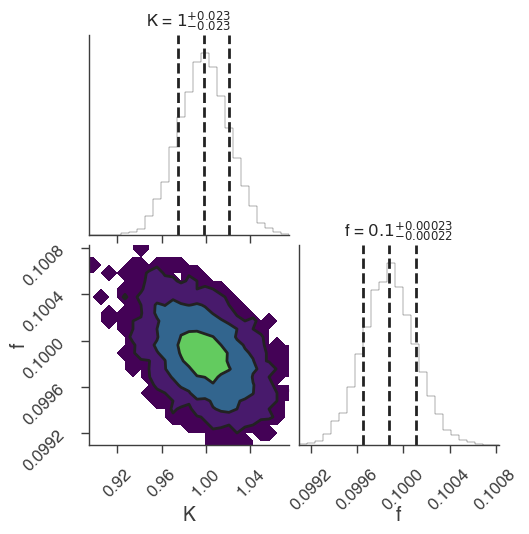

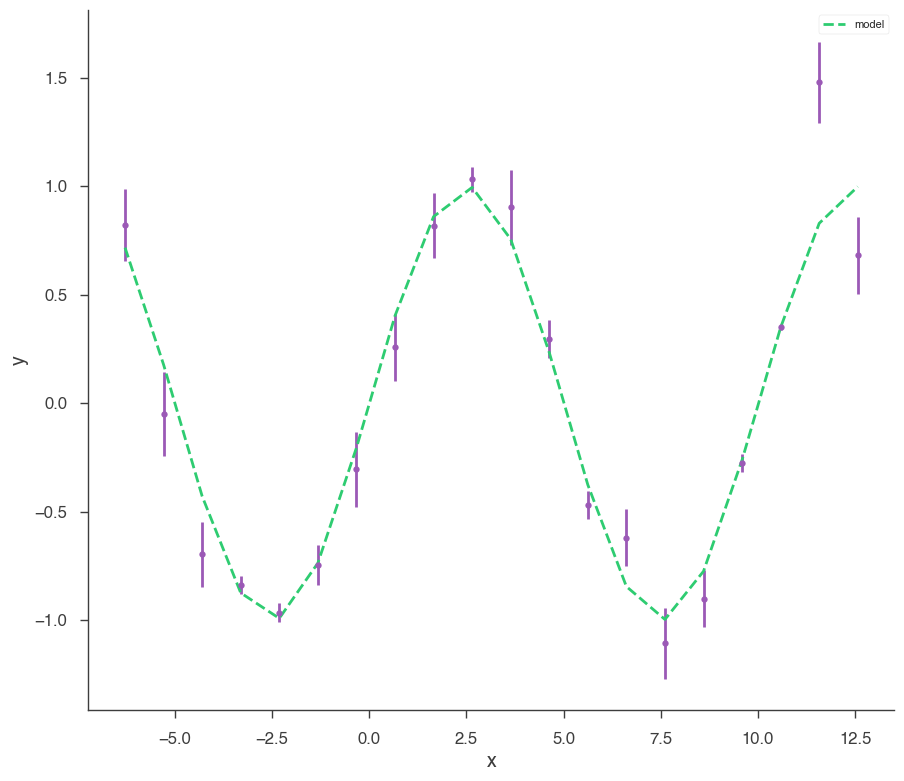

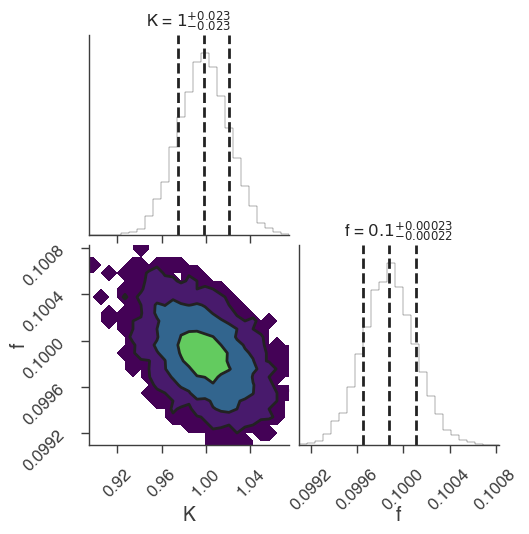

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

13:59:37 INFO      sampler set to ultranest                                                ]8;id=233486;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=121069;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+01  


[ultranest] Likelihood function evaluations: 10426


[ultranest]   logZ = -25.22 +- 0.1262


[ultranest] Effective samples strategy satisfied (ESS = 999.4, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.13 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


13:59:50 INFO      fit restored to maximum of posterior                                         ]8;id=641817;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=127038;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=730185;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=360741;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.98 -0.25 +0.23) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.986 -0.022 +0.025) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-15.420754
total,-15.420754


Values of statistical measures:

,statistical measures
AIC,35.547390
BIC,36.832972
DIC,34.992223
PDIC,2.075845
log(Z),-10.944132


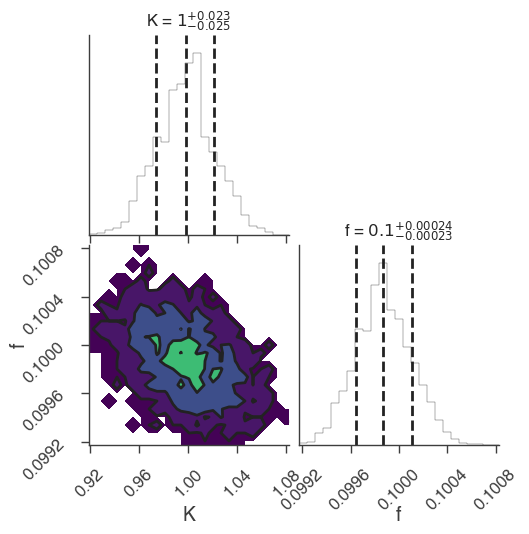

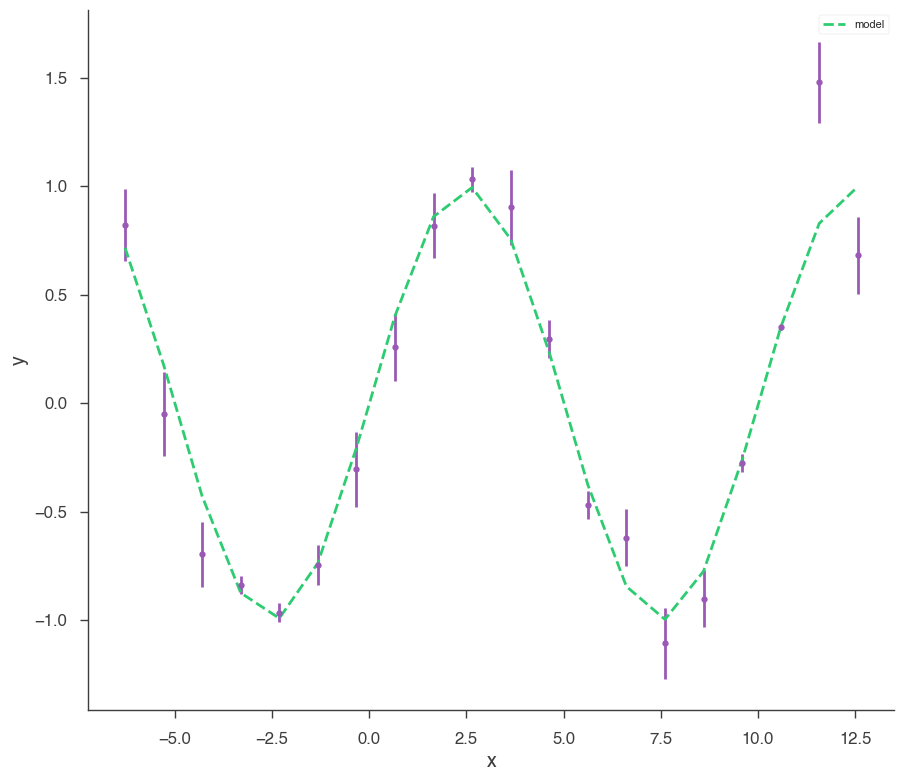

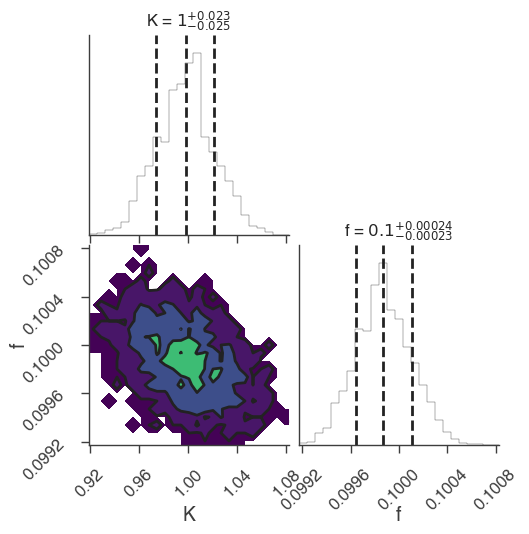

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()